In [17]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Task 1

## 1 Import .csv files

In [18]:
# We will create a multidimensional dataset with in dimension
# dim 1: weather conditions
# dim 2: the file label

# Initializing label sets
weatherconditions = ["clear-night", "clear-noon", "clear-sunset", "haze-noon", "haze-sunset", "rain-noon"]
labelset = ["ctl", "cvip", "traj"]

# Necessary time stamps to get the correct path to the file
timestamps = { 
    "clear-night" : "0912_145136",
    "clear-noon" : "0912_144500",
    "clear-sunset" : "0912_144802",
    "haze-noon" : "0912_144913",
    "haze-sunset" : "0912_145024",
    "rain-noon" : "0912_144715"
}

# Initializing the dataset
dataset = dict()

# Filling the dataset with the imports
for weather in weatherconditions:
    dataset[weather] = dict()
    for label in labelset:
        dataset[weather][label] = pd.read_csv("results\\MP1\\OOD-Weather\\campaign_results\\route_highway_epoch24_" 
                                              + weather 
                                              + "_fi_ghost_cutin\\routes_fi_route_highway-"
                                              + timestamps[weather]
                                              + "-data_fi_ghost_cutin-single_" 
                                              + label 
                                              + ".csv"
                                            )
# Result: dataset[weather][label] gives the imported csv of the file.

for weather in weatherconditions:
    for label in labelset:
        print(dataset[weather][label].head())

      ts  agent_id  throttle     steer  brake
0  74325         0       0.9 -0.002665    0.0
1  74326         0       0.9 -0.011529    0.0
2  74327         0       0.9 -0.009963    0.0
3  74328         0       0.9 -0.011508    0.0
4  74329         0       0.9  0.000712    0.0
      ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  74325         0  500.491189  198.767441 -95.832657 -499.819366
1  74326         0    5.595580  195.567444 -90.832657    0.100000
2  74327         0    5.592365  195.567444 -90.832657    0.095407
3  74328         0    5.589578  195.567444 -90.832657    0.084691
4  74329         0    5.587154  195.567444 -90.832657    0.069311
      ts  agent_id           x         y         z    v
0  74325         0  192.362411 -86.26268  0.539326  0.0
1  74326         0  192.362411 -86.26268  0.491906  0.0
2  74327         0  192.362411 -86.26268  0.438374  0.0
3  74328         0  192.362411 -86.26268  0.378732  0.0
4  74329         0  192.362411 -86.26268  0.3129

## 2 Summarize

a. Duration of the scene

In [19]:
# Initialize the statistics dataset
statistics = dict()

# Compute the duration for each weather condition
for weather in weatherconditions:
    statistics[weather] = dict()
    statistics[weather]["Duration"] = dataset[weather]["ctl"]["ts"].iloc[-1] - dataset[weather]["ctl"]["ts"].iloc[0]

b. Means and standard deviations of attributes

In [20]:
# The statistics we want to compute
stats = ["throttle", "steer", "brake", "cvip", "x", "y", "v"]

# Compute the mean and standard deviation, add it to the statistics dictionary.
for weather in weatherconditions:
    for label in labelset:
        for stat in stats:
            a = dataset[weather][label].get(stat) # Returns None if stat is not a key in the dictionary
            if a is not None: # Add the mean and std as a list of size two to the key stat
                statistics[weather][stat] = [round(a.mean(), 3), round(a.std(), 3)] 

# Summary: statistics[weather] is a collection of stats of the scenario "weather". 
# It has a key "Duration" which outputs an integer
# The other keys output a list of [mean, std], both rounded to three decimal places.

# If you want to use a for loop to run through the keys of stat, use "for stat in list(statistics[weather].keys())".
# You might want to exclude "Duration" in the for loop.
# This way you don't have to copy the list of stats anymore.


In [21]:
pd.DataFrame(statistics)

,clear-night,clear-noon,clear-sunset,haze-noon,haze-sunset,rain-noon
Duration,818,752,756,754,762,400
throttle,"[0.62, 0.342]","[0.609, 0.282]","[0.611, 0.281]","[0.602, 0.299]","[0.607, 0.299]","[0.648, 0.272]"
steer,"[0.004, 0.046]","[0.0, 0.005]","[0.0, 0.005]","[0.001, 0.005]","[0.001, 0.005]","[-0.0, 0.004]"
brake,"[0.105, 0.307]","[0.058, 0.235]","[0.057, 0.232]","[0.057, 0.232]","[0.056, 0.231]","[0.042, 0.202]"
cvip,"[29.198, 29.973]","[19.514, 24.282]","[20.058, 24.641]","[19.996, 24.134]","[20.967, 24.883]","[7.052, 24.735]"
x,"[191.311, 1.168]","[192.92, 0.403]","[192.946, 0.401]","[192.94, 0.41]","[192.944, 0.41]","[192.631, 0.252]"
y,"[-31.8, 39.65]","[-31.315, 40.557]","[-31.223, 40.404]","[-31.74, 40.735]","[-31.502, 40.483]","[-63.985, 21.067]"
v,"[6.381, 2.927]","[6.927, 3.286]","[6.883, 3.315]","[6.907, 3.058]","[6.828, 3.071]","[6.34, 3.87]"


In [0.62,0.342] the first number is the mean and the standard deviation

## 3 Plot

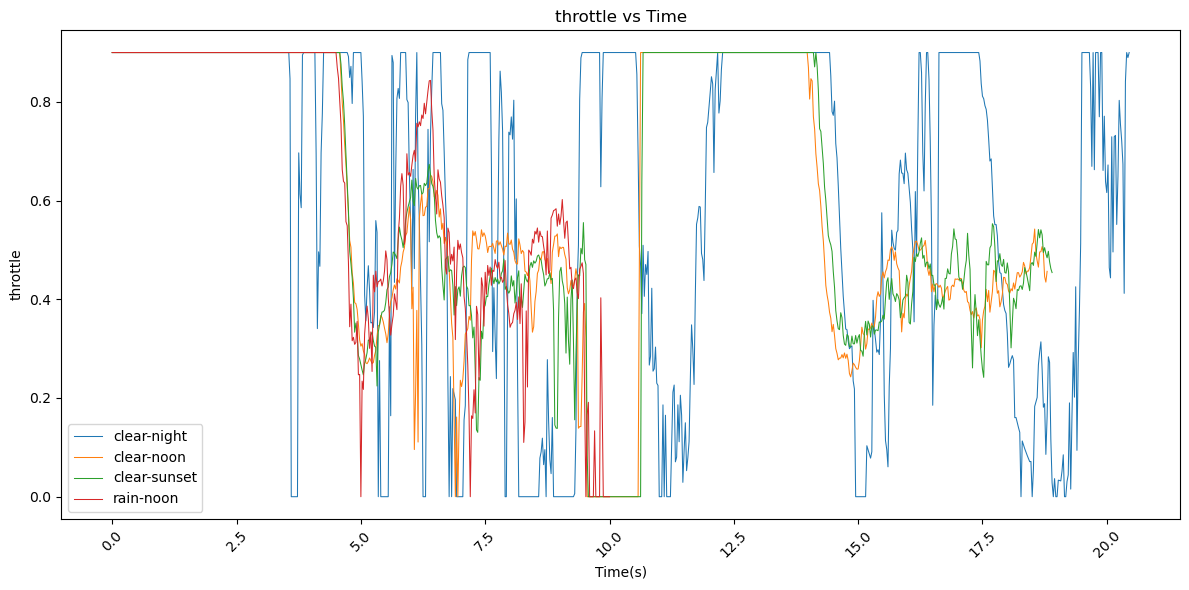

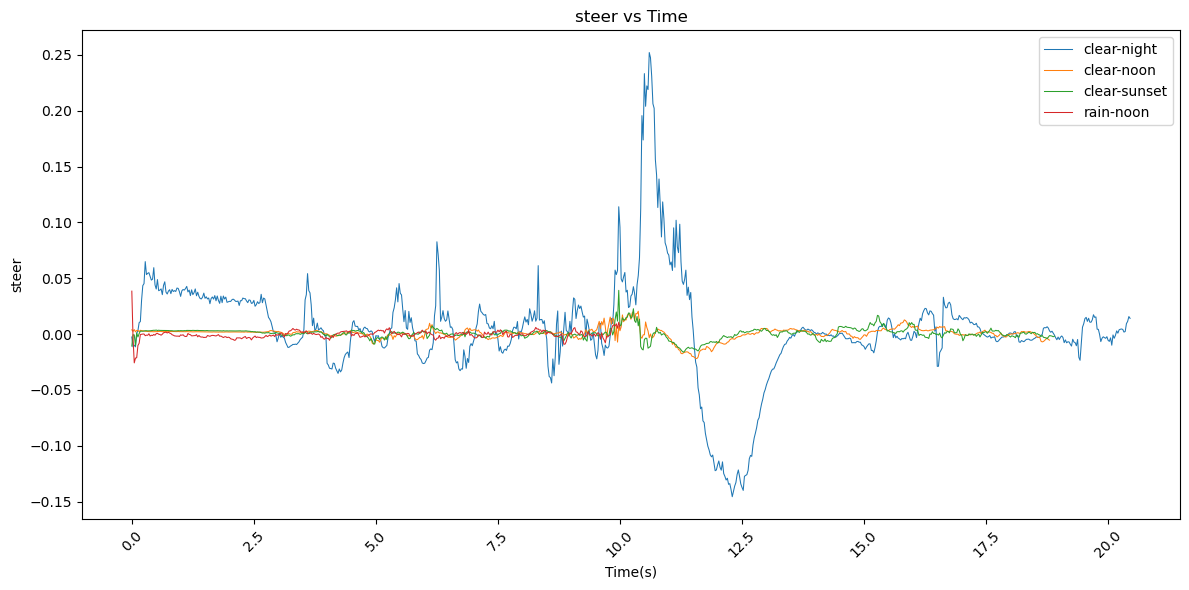

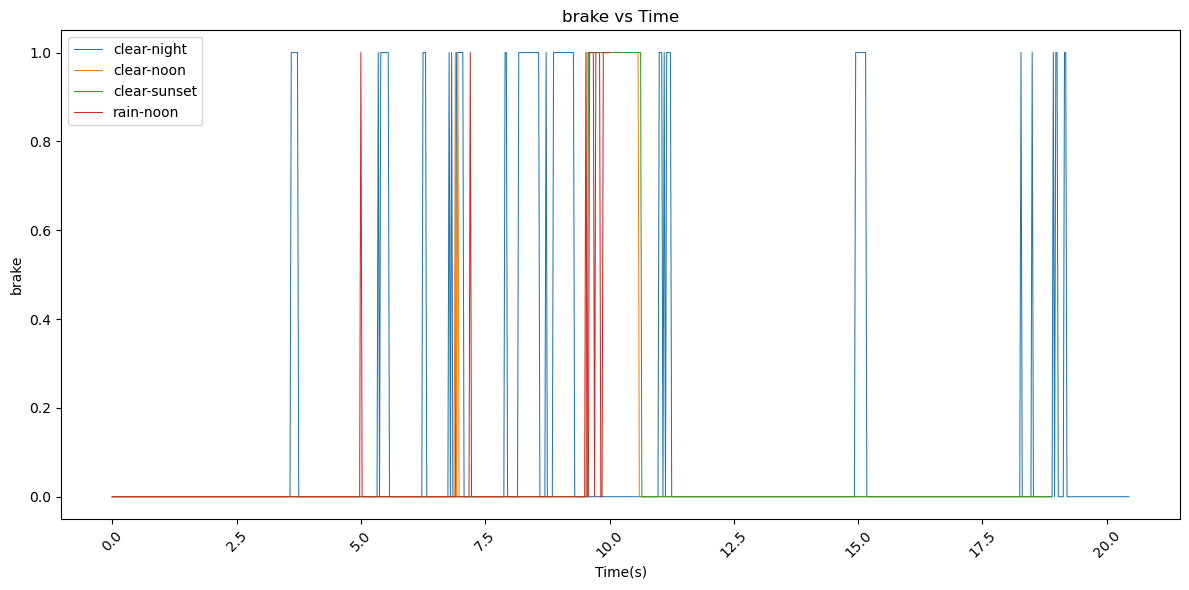

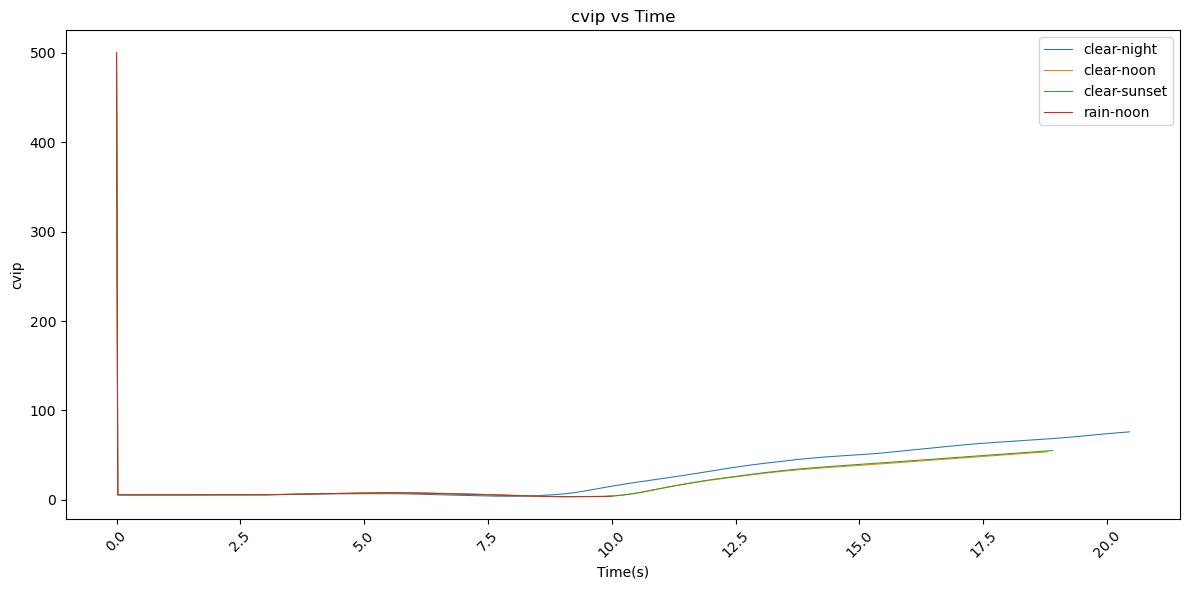

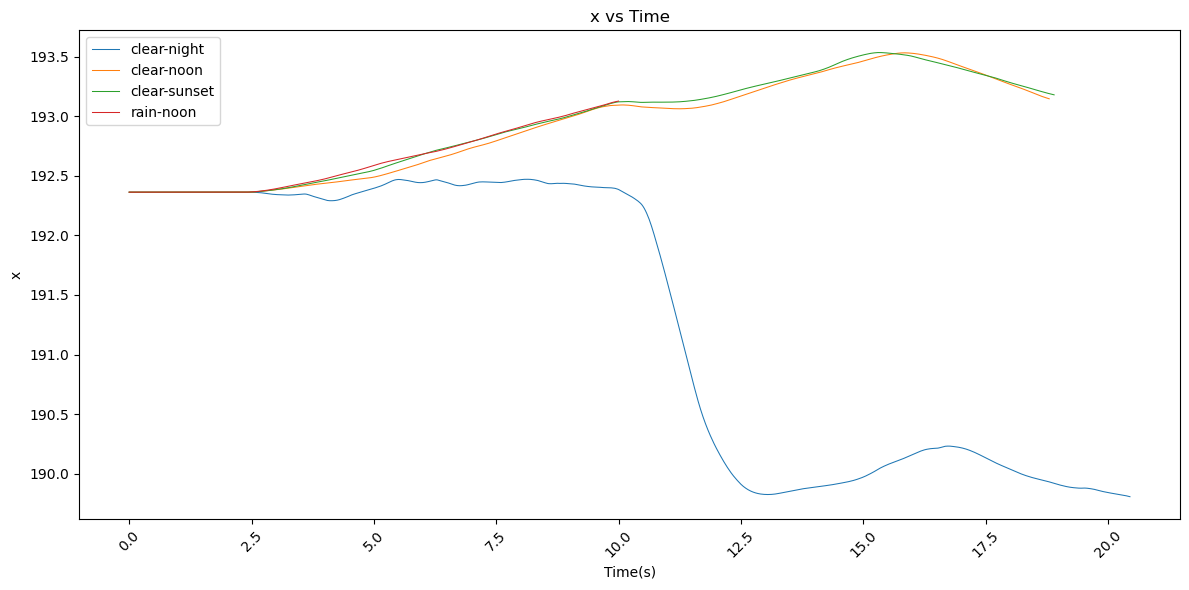

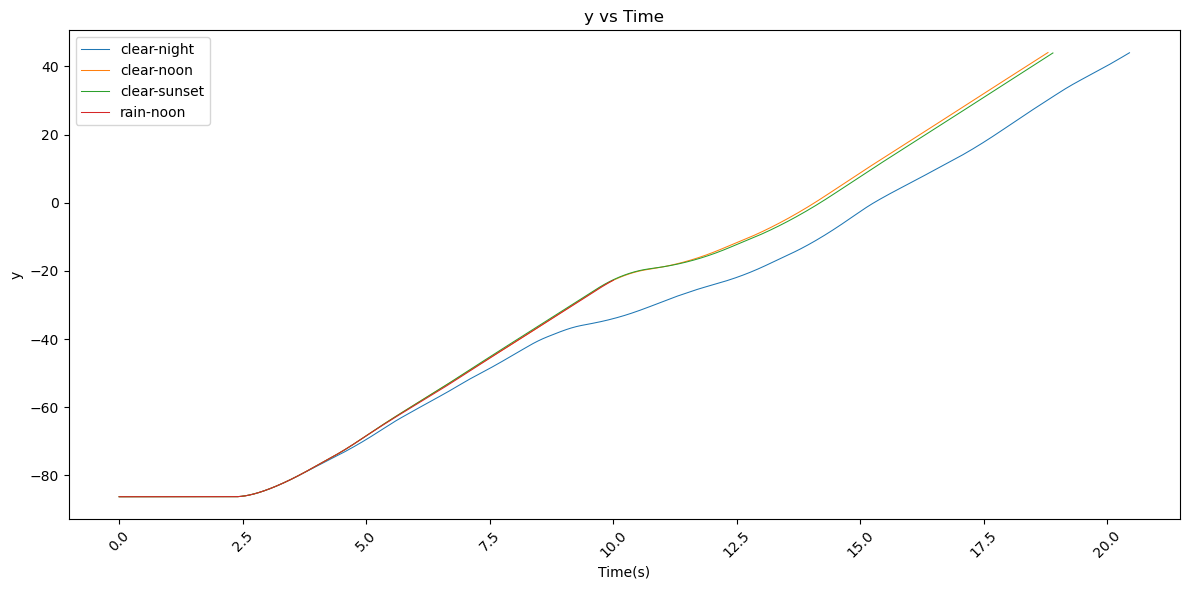

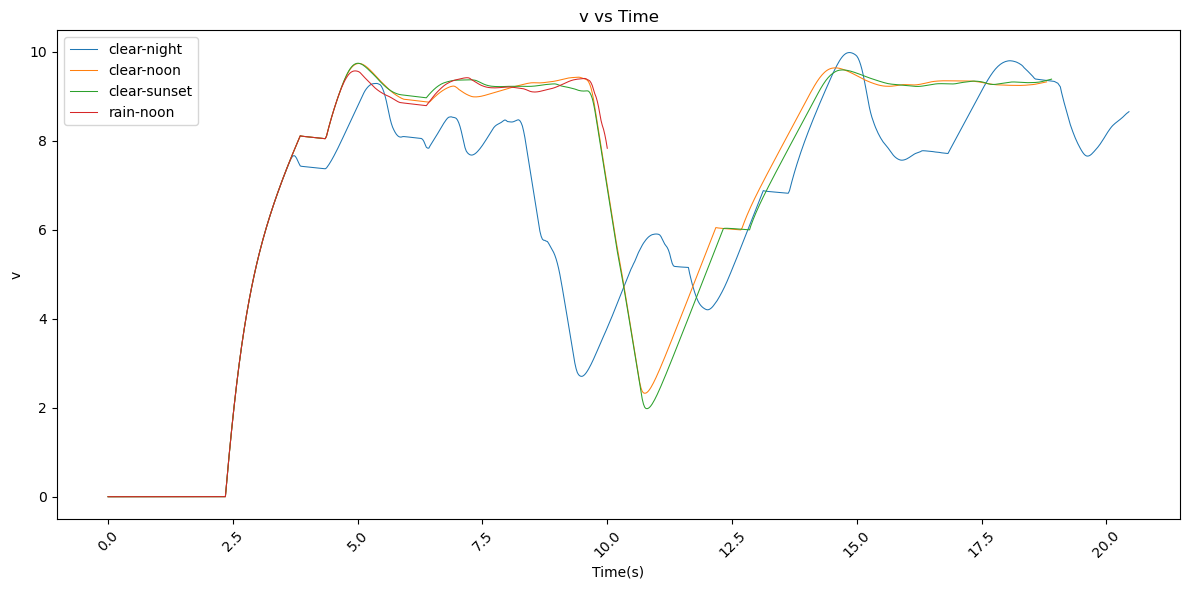

In [22]:
# Excluding the haze weather conditions
no_haze = ["clear-night", "clear-noon", "clear-sunset", "rain-noon"]

# For a given stat, plot all the weather conditions in one plot
for stat in stats:
    plt.figure(figsize = (12, 6))
    for weather in no_haze:
        for label in labelset:
            y = dataset[weather][label].get(stat)    
            if y is not None:
                    plt.plot((dataset[weather][label]["ts"]-dataset[weather][label]["ts"].iloc[0])/40 # Time starts at 0
                    , y, label=weather, linewidth=0.75) 
    plt.title(stat + " vs Time")
    plt.xlabel("Time(s)")
    plt.ylabel(stat)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

The first value of the cvip plot is an outlier. Here we replot it, starting at timestamp 1 instead of 0, to get a better view.

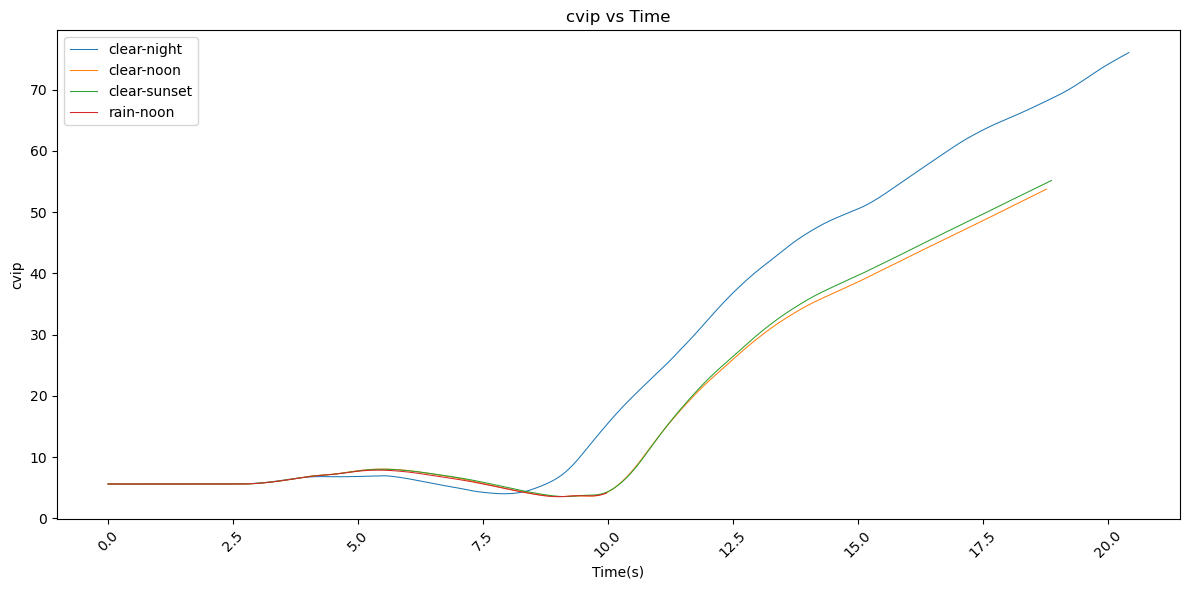

In [23]:
for stat in ["cvip"]:
    plt.figure(figsize = (12, 6))
    for weather in no_haze:
        for label in labelset:
            y = dataset[weather][label].get(stat)    
            if y is not None:
                    plt.plot((dataset[weather][label]["ts"][1:]-dataset[weather][label]["ts"].iloc[1])/40
                    , y[1:], label=weather, linewidth=0.75) 
    plt.title(stat + " vs Time")
    plt.xlabel("Time(s)")
    plt.ylabel(stat)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 4

The most telltale sign of an accident is the simulation stopping early compared to the others. If a stimulation that stops early also applies brakes and/or steering a lot, together with a very low cvip, it is very likely that the simulation ended in an accident

From looking at the plots we guess that there was an accident in rain-noon simulation, because this simulation stops before the others.

## Task 2

### 1.
We will start by putting the status and simulation in a table.

In [24]:
# import text files, and put it in one dataset.
results = dict()
for weather in weatherconditions:
    with open("results\\MP1\\OOD-Weather\\campaign_results\\route_highway_epoch24_"
              + weather
              + "_fi_ghost_cutin\\route_highway.txt", 
              "r") as file:
        results[weather] = json.loads(file.read())

# Extract the status for each scenario and put it in a table
results_status = dict()
for weather in weatherconditions:
    results_status[weather] = results[weather]["_checkpoint"]["records"][0]["status"]

pd.Series(results_status)

clear-night     Completed
clear-noon      Completed
clear-sunset    Completed
haze-noon       Completed
haze-sunset     Completed
rain-noon          Failed
dtype: object

In [25]:
# Table with weather and time of day
results_table = dict()
for timeOfDay in ["noon", "sunset", "night"]:
    results_table[timeOfDay] = dict()
    for weathercondition in ["clear", "haze", "rain"]:
        results_table[timeOfDay][weathercondition] = results_status.get(weathercondition + "-" + timeOfDay)

print(pd.DataFrame(results_table))



            noon     sunset      night
clear  Completed  Completed  Completed
haze   Completed  Completed       None
rain      Failed       None       None


Unconditional probability of an accident is 1/6, since there is one accident over 6 simulations.

## 2 
Under rainy conditions at noon, the simulation fails, which aligns with our prediction in Task 1. By examining the plots, we see that all the red curves end at time = 10s, indicating that the accident occurred at this moment. The accident seems to happen because the vehicle did not slow down fast enough before collision. It is possible that the vehicle detected the obstruction too late due to the weather.



## 3
The two abnormal runs are clear-night and rain-noon.

The rain-noon run results an accident. 
- We observe frequent braking before the accident occurred. It is possible that the autonomous vehicle (AV) detected a nearby non-playable character (NPC) and attempted to avoid a collision.
- We also observe that the velocities drop at approximately the same time in the clear-subset, clear-noon, and rain-noon cases. However, in the rainy-noon case, the velocity decreases more slowly.

For the other abnormal run (clear-night). There is much more steering than in the other runs. It looks like, form the x-values plot, that the vehicle switched lanes, possibly to avoid conflict.



## 4
### (a).

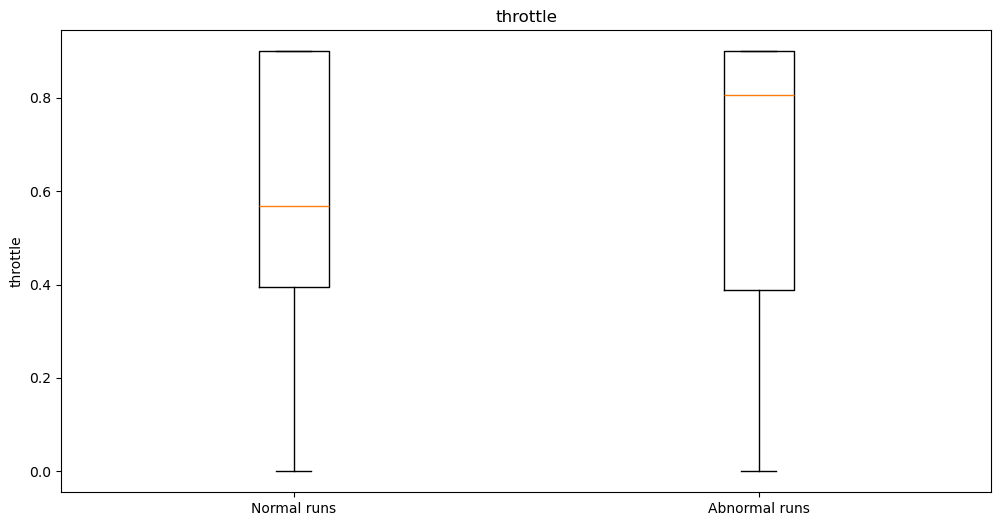

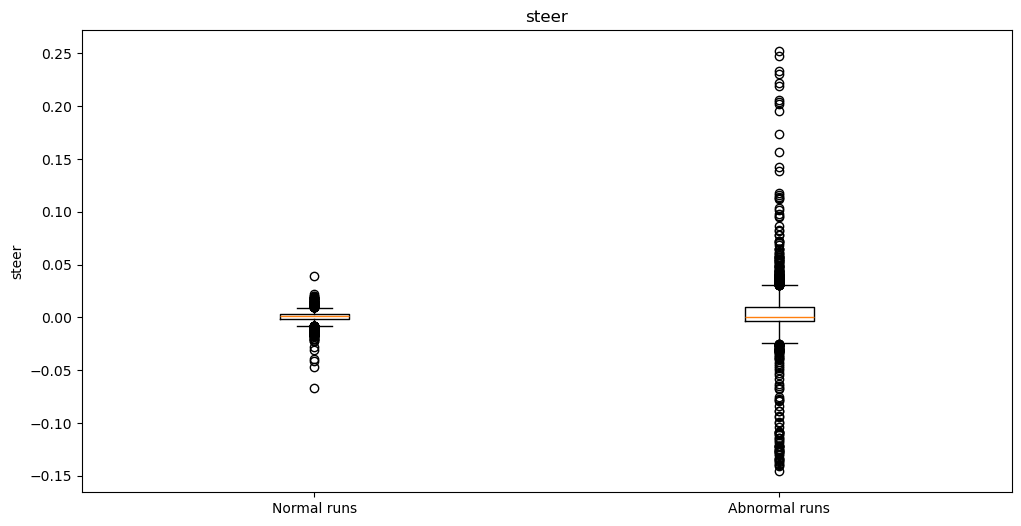

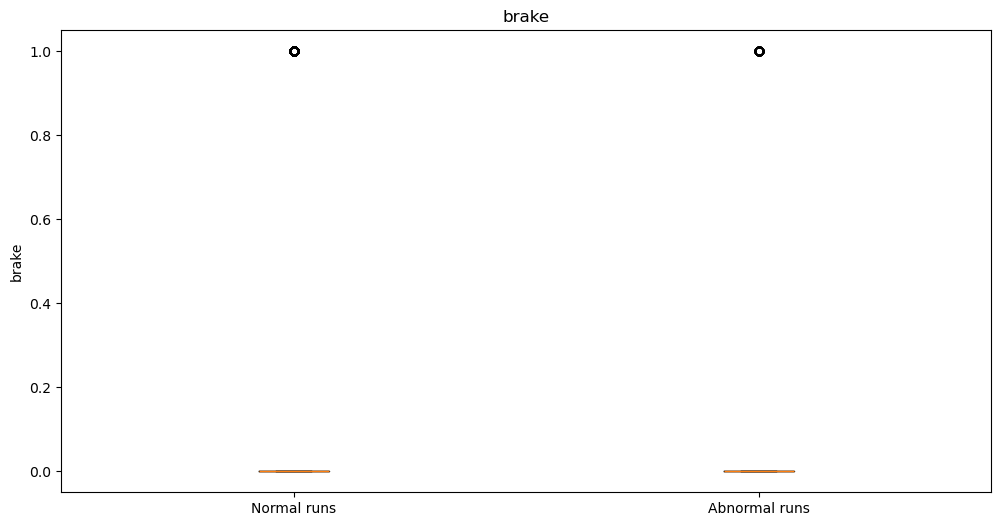

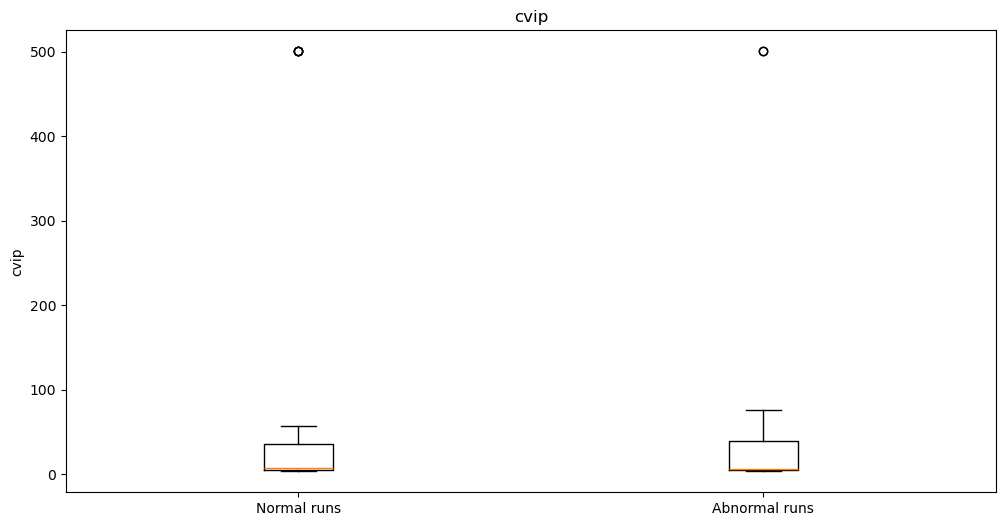

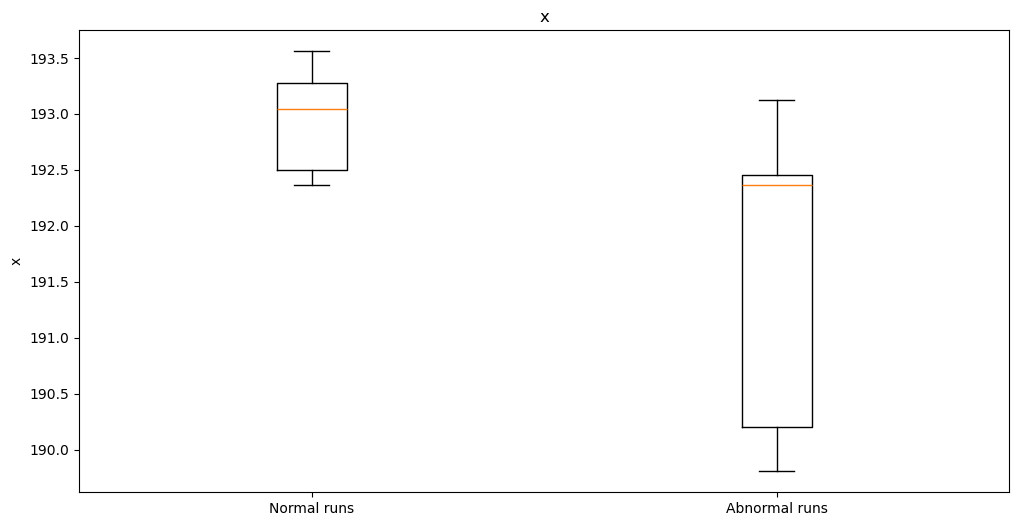

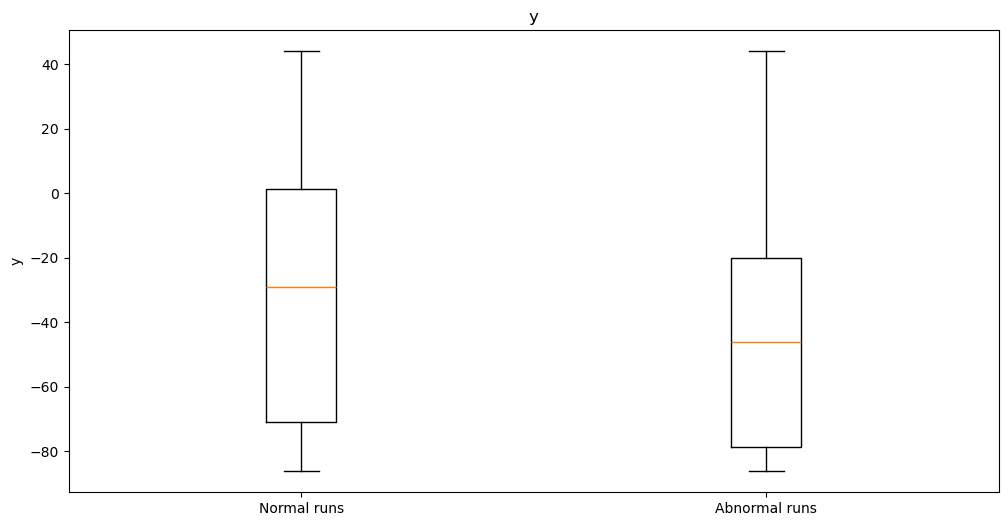

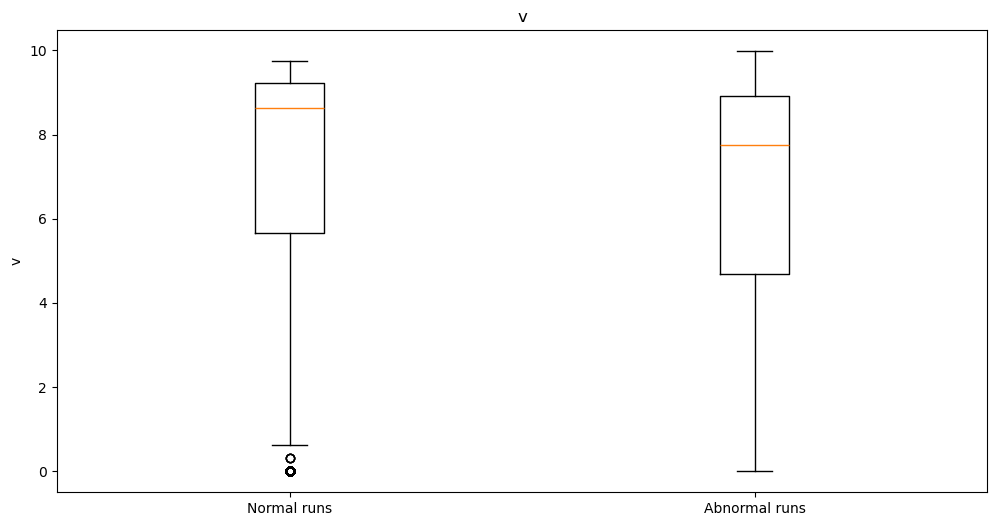

In [26]:
items_to_plot = [("ctl","throttle"), ("ctl","steer"), ("ctl","brake"),("cvip","cvip"), ("traj","x"), ("traj","y"), ("traj","v")] 

normal_weather = [ "clear-noon", "clear-sunset","haze-noon", "haze-sunset"]
abnormal_weather = ["clear-night", "rain-noon"]

for item in items_to_plot:
    plt.figure(figsize=(12, 6))

    normal = pd.concat([dataset[w][item[0]][item[1]] for w in normal_weather])
    abnormal = pd.concat([dataset[w][item[0]][item[1]] for w in abnormal_weather])
    plt.boxplot([normal, abnormal], labels=["Normal runs", "Abnormal runs"])
    plt.title(f"{item[1]}")
    plt.ylabel(item[1])
    plt.show()

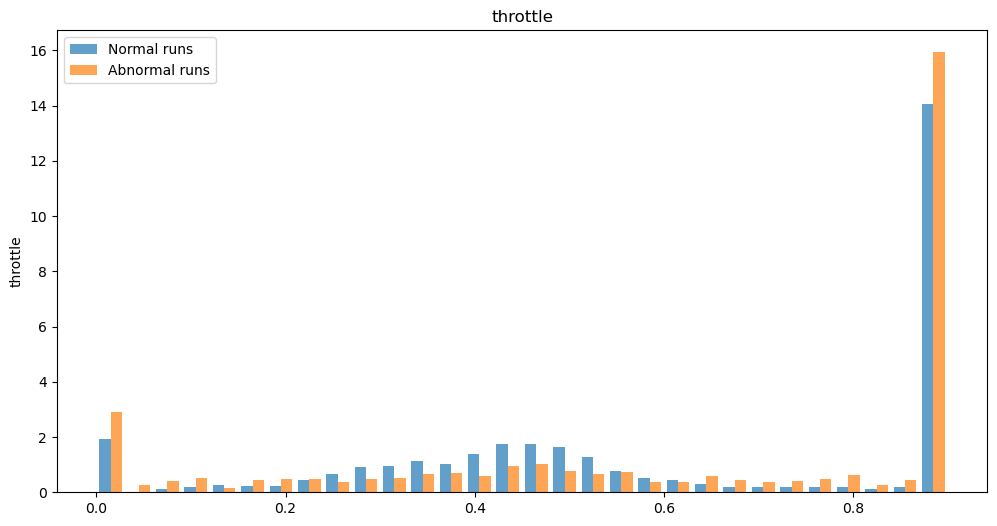

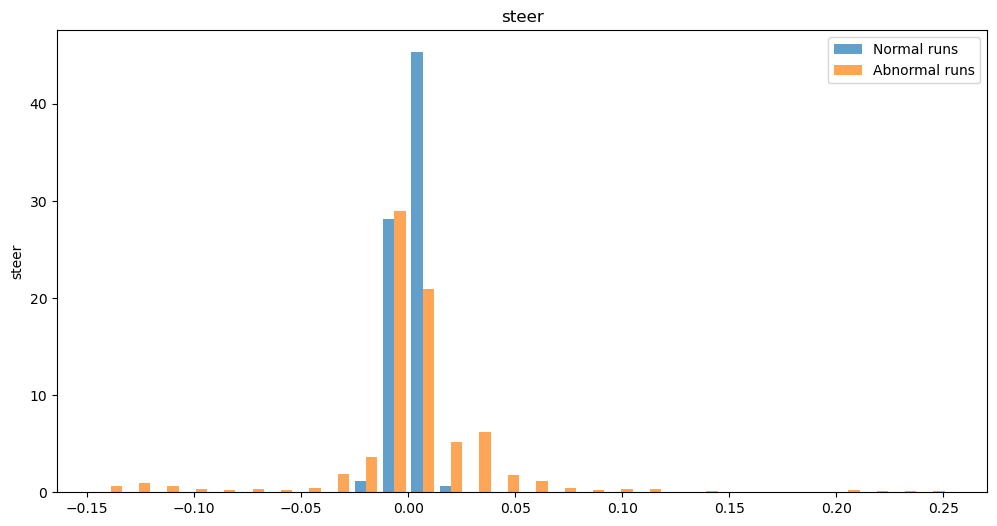

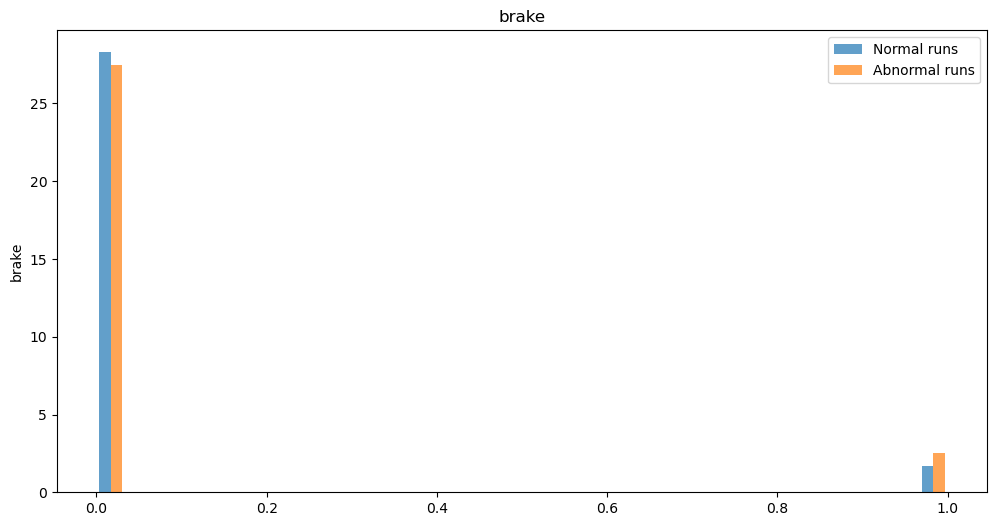

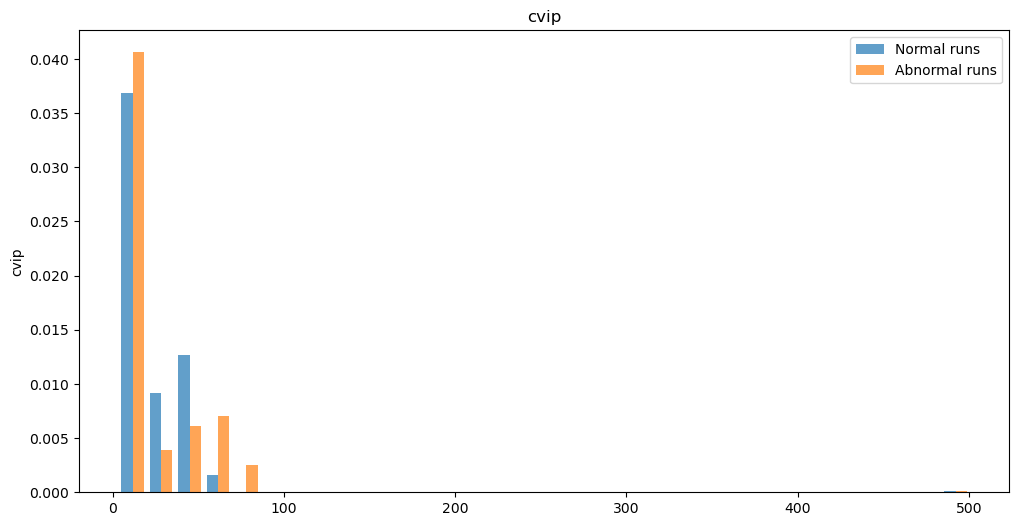

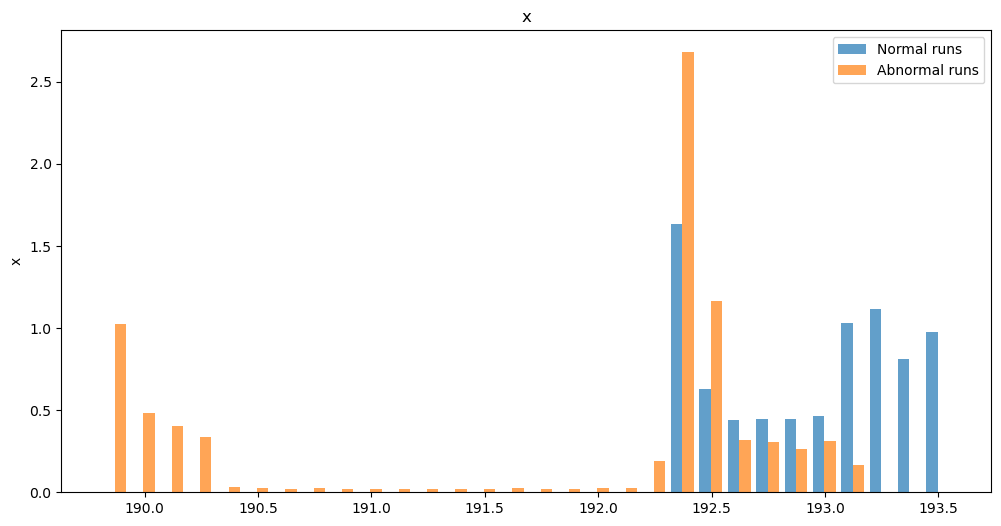

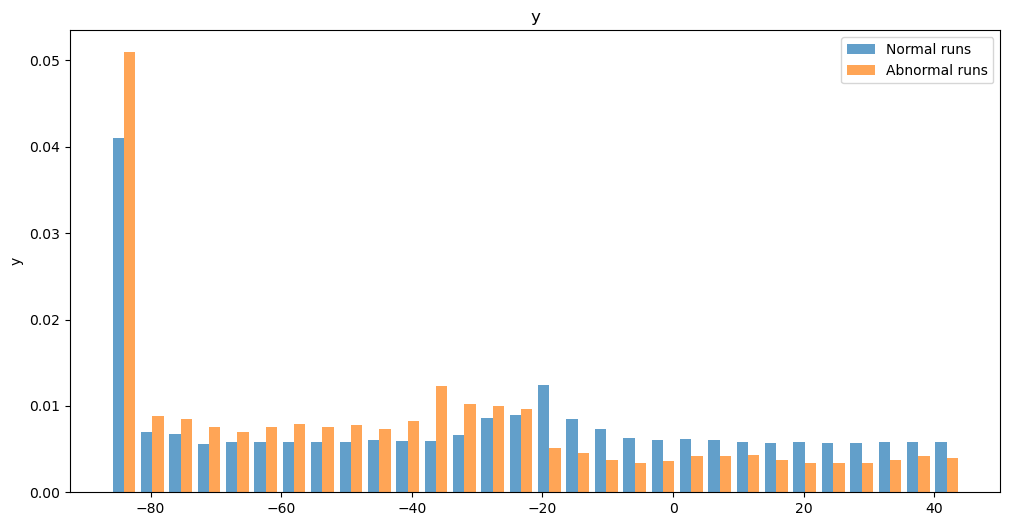

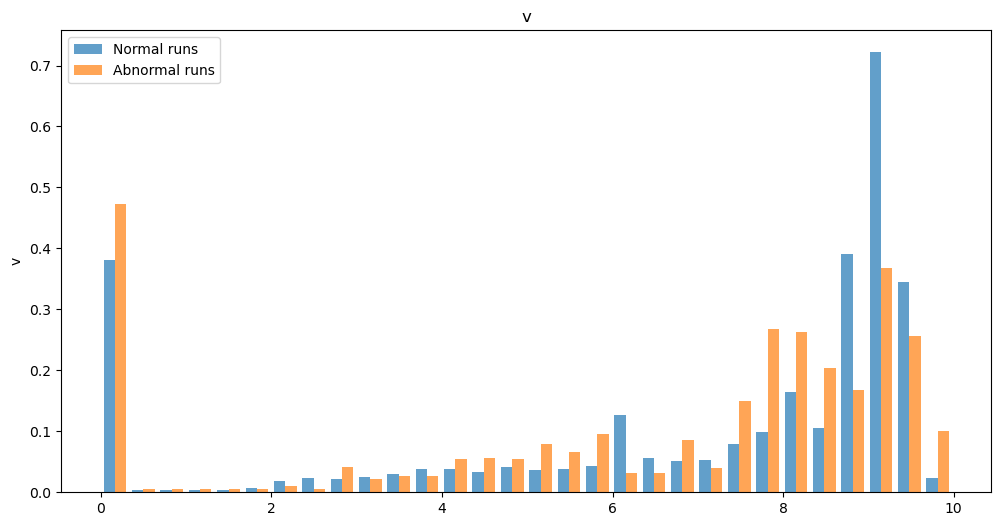

In [27]:
items_to_plot = [("ctl","throttle"), ("ctl","steer"), ("ctl","brake"),("cvip","cvip"), ("traj","x"), ("traj","y"), ("traj","v")] 

normal_weather = [ "clear-noon", "clear-sunset","haze-noon", "haze-sunset"]
abnormal_weather = ["clear-night", "rain-noon"]

for item in items_to_plot:
    plt.figure(figsize=(12, 6))

    normal = pd.concat([dataset[w][item[0]][item[1]] for w in normal_weather])
    abnormal = pd.concat([dataset[w][item[0]][item[1]] for w in abnormal_weather])
    plt.hist([normal, abnormal], label=["Normal runs", "Abnormal runs"], bins=30, alpha=0.7, density=True)
    plt.legend()
    plt.title(f"{item[1]}")
    plt.ylabel(item[1])
    plt.show()

The biggest difference between the normal and abnormal runs seems to be in the variance of the steering values.

### b

ii

In [29]:
from scipy import stats

normal = pd.concat([dataset[w]["ctl"]['steer'] for w in normal_weather])
abnormal = pd.concat([dataset[w]["ctl"]['steer'] for w in abnormal_weather])

t_statistic, p_value = stats.ttest_ind(normal, abnormal,equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")

T-statistic: -1.9433898083217644
P-value: 0.05219581870253174
Fail to reject the null hypothesis. There is no significant difference between the two groups.


There is no significant difference between the means of the steerinng values of the normal and abnormal runs. This is to be expected. On eshould test for the differences in variance instead.